# Resolução de Case Técnico - PS LIGIA 2026

## **IMPORTANDO BIBLIOTECAS**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import kagglehub
import os

## **EDA**

### **BAIXANDO OS DADOS**

In [98]:
# Download latest version
path = kagglehub.dataset_download("uom190346a/sleep-health-and-lifestyle-dataset")

def load_dataset(dataset_dir_path):
    csv_file_name = "Sleep_health_and_lifestyle_dataset.csv"
    full_csv_path = os.path.join(dataset_dir_path, csv_file_name)
    df = pd.read_csv(full_csv_path)
    return df

df_origin = load_dataset(path)

Using Colab cache for faster access to the 'sleep-health-and-lifestyle-dataset' dataset.


Carregando o dataset via link de download.

In [99]:
df_origin.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


O dataset 'Sleep Health and Lifestyle' foi carregado no ambiente e uma visualização inicial das primeiras linhas foi feita para verificação da estrutura dos dados.


### **PREPARAÇÃO INICIAL DOS DADOS**

In [100]:
def dividir_pressao(dataset):
    dataset[['Systolic', 'Diastolic']] = (
    dataset['Blood Pressure']
    .str.split('/', expand=True)
    .astype(float)
    )
    return dataset

def converter_NaN_Sleep_disorder(dataset):
  dataset['Sleep Disorder'] = dataset['Sleep Disorder'].fillna('No Disorder')
  return dataset

def ajuste_inical(dataset):
  dataset =  dividir_pressao(dataset)
  dataset = dataset.drop(columns=['Blood Pressure'])
  dataset = converter_NaN_Sleep_disorder(dataset)
  return dataset

df = ajuste_inical(df_origin)
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No Disorder,126.0,83.0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Disorder,125.0,80.0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Disorder,125.0,80.0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0


Para facilitar as explorações futuras, duas coisas foram feitas.


*   Separar sístole e diástole da pressão arterial
*   Trocar os valores NaN da coluna `Sleep disorder` por `No disorder`, pois pela estrutura do dataset os valores nulos nesse campo representam a ausência de distúrbios do sono.



### **ANÁLISE EXPLORATÓRIA DE DADOS**

In [101]:
df.info()
df.describe().round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
 12  Systolic                 374 non-null    float64
 13  Diastolic                374 non-null    float64
dtypes: float64(3), int64(7), o

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Diastolic
count,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00
mean,187.50,42.18,7.13,7.31,59.17,5.39,70.17,6816.84,128.55,84.65
std,108.11,8.67,0.80,1.20,20.83,1.77,4.14,1617.92,7.75,6.16
min,1.00,27.00,5.80,4.00,30.00,3.00,65.00,3000.00,115.00,75.00
25%,94.25,35.25,6.40,6.00,45.00,4.00,68.00,5600.00,125.00,80.00
50%,187.50,43.00,7.20,7.00,60.00,5.00,70.00,7000.00,130.00,85.00
75%,280.75,50.00,7.80,8.00,75.00,7.00,72.00,8000.00,135.00,90.00
max,374.00,59.00,8.50,9.00,90.00,8.00,86.00,10000.00,142.00,95.00


Observa-se que o dataset contém variáveis relacionadas a dados demográficos, hábitos de vida e métricas de saúde.
A variável de interesse do projeto é `Sleep Disorder`.


###**ANÁLISE DE DADOS FALTANTES, DUPLICATAS OU INCONSISTENTE**

In [102]:
print(df.isna().sum())
print(f"Dados duplicados: {df.duplicated().sum()}")

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
Systolic                   0
Diastolic                  0
dtype: int64
Dados duplicados: 0


Nenhum valor nulo ou instância duplicada foi encontrado.

###**ANÁLISE UNIVARIADA**

#### **Variável alvo**


,count
Sleep Disorder,
No Disorder,219
Sleep Apnea,78
Insomnia,77


/tmp/ipython-input-2826517657.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'{percent[i]:.1f}%',


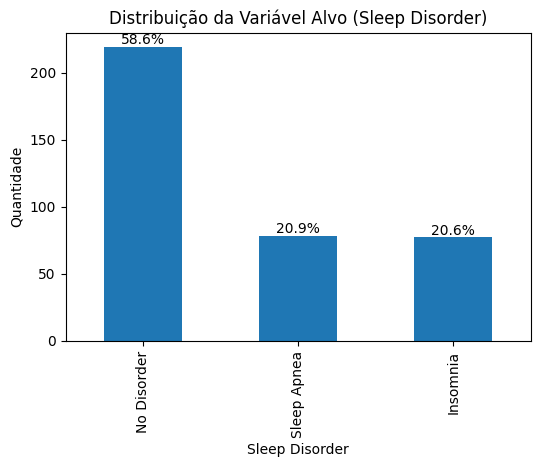

In [103]:
display(df['Sleep Disorder'].value_counts())

counts = df['Sleep Disorder'].value_counts()
percent = counts / counts.sum() * 100

ax = counts.plot(kind='bar', figsize=(6,4))

plt.title('Distribuição da Variável Alvo (Sleep Disorder)')
plt.xlabel('Sleep Disorder')
plt.ylabel('Quantidade')

for i, value in enumerate(counts):
    ax.text(
        i,
        value,
        f'{percent[i]:.1f}%',
        ha='center',
        va='bottom'
    )

plt.show()


A variável alvo `Sleep Disorder` apresenta três categorias: Insônia, Apneia do Sono e indivíduos sem distúrbios.

Originalmente, a variável `Sleep Disorder` apresentava valores ausentes, os quais, conforme a documentação do dataset, representam indivíduos sem diagnóstico de distúrbio do sono. Esses valores foram convertidos para a categoria **No Disorder** para facilitar a análise.

Entre os indivíduos com diagnóstico, nota-se uma distribuição semelhante entre **Insônia** e **Apneia do Sono**, enquanto a classe **No Disorder** representa a maioria dos registros.

#### **Variáveis categóricas**


In [104]:
categorical_cols = ['Gender', 'BMI Category', 'Occupation']

for col in categorical_cols:
    print(f"\n{col}")
    print(df[col].value_counts())


Gender
Gender
Male      189
Female    185
Name: count, dtype: int64

BMI Category
BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

Occupation
Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: count, dtype: int64


A variável `Gender` apresenta distribuição equilibrada entre os gêneros.

Na variável `BMI Category`, observa-se a presença das categorias "Normal" e "Normal Weight", que semanticamente representam a mesma condição. Essa inconsistência de nomenclatura deverá ser padronizada no pré-processamento dos dados.

A variável `Occupation` apresenta alta diversidade de categorias, com maior concentração em profissões como enfermeiro, médico e engenheiro. Essa característica reflete diferentes rotinas profissionais, as quais podem estar associadas a hábitos de sono e níveis de estresse.


#### **Variáveis numéricas**


In [105]:
numeric_cols = ['Age', 'Sleep Duration', 'Quality of Sleep',
                'Physical Activity Level', 'Stress Level', 'Systolic', 'Diastolic', 'Heart Rate', 'Daily Steps']

df[numeric_cols].describe().round(2)

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Systolic,Diastolic,Heart Rate,Daily Steps
count,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00
mean,42.18,7.13,7.31,59.17,5.39,128.55,84.65,70.17,6816.84
std,8.67,0.80,1.20,20.83,1.77,7.75,6.16,4.14,1617.92
min,27.00,5.80,4.00,30.00,3.00,115.00,75.00,65.00,3000.00
25%,35.25,6.40,6.00,45.00,4.00,125.00,80.00,68.00,5600.00
50%,43.00,7.20,7.00,60.00,5.00,130.00,85.00,70.00,7000.00
75%,50.00,7.80,8.00,75.00,7.00,135.00,90.00,72.00,8000.00
max,59.00,8.50,9.00,90.00,8.00,142.00,95.00,86.00,10000.00


A análise univariada das variáveis numéricas indica um conjunto de dados
bem distribuído de adultos com idade média de aproximadamente 42 anos, com valores
variando entre 27 e 59 anos.

As métricas relacionadas ao sono mostram comportamento consistente com duração média do sono de cerca de 7,1 horas, qualidade do sono média em torno de 7,3 de 10, indicando, em geral, uma percepção moderada a boa da qualidade do descanso.

O número de passos diários apresenta média próxima de 6.800 passos,
com variação entre 3.000 e 10.000, refletindo diferentes níveis de atividade física. Esse comportamento é coerente com a variável `Physical Activity Level`, com média aproximada de 59 pontos, indicando uma diversidade de perfis no dataset.

O nível de estresse apresenta média de aproximadamente 5,4, com valores concentrados entre 4 e 7, sugerindo níveis moderados de estresse na amostra.

Já os valores de pressão arterial, após a separação entre sistólica e diastólica, mostram médias de cerca de 129 mmHg e 85 mmHg, respectivamente, consistentes com faixas fisiológicas esperadas para uma população adulta.

De forma geral, as variáveis numéricas não apresentam valores extremos inconsistentes e demonstram variabilidade suficiente para contribuir de maneira relevante para a tarefa de classificação dos distúrbios do sono.

#### **Conclusão**


De forma geral, a análise univariada permitiu compreender a distribuição individual das variáveis do dataset e identificar pontos relevantes para as próximas etapas.

Destacam-se a inconsistência de nomenclatura na variável `BMI Category` e a diversidade de categorias na variável `Occupation`, aspectos que serão tratados ou avaliados na etapa de pré-processamento.

Essas observações auxiliam na definição das estratégias para a análise bivariada, multivariada e modelagem preditiva.


###**ANÁLISE BIVARIADA**

O objetivo da anásilse bivariada é encontrar possíveis relações entre o atributo target, que no nosso caso é `Sleep Disorder`, em relação aos outros atributos, os Features.

#### **Variáveis categóricas**

##### **Sleep Disorder X Gender**

In [106]:
categorical = categorical_cols[0]

table_counts = pd.crosstab(
    df['Sleep Disorder'],
    df[categorical]
)
table_counts['Total'] = table_counts.sum(axis=1)

display(table_counts)

Gender,Female,Male,Total
Sleep Disorder,,,
Insomnia,36,41,77
No Disorder,82,137,219
Sleep Apnea,67,11,78


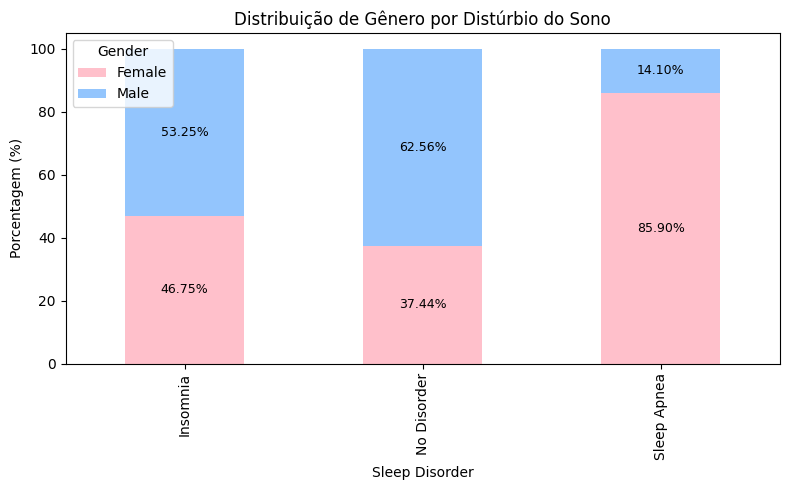

In [107]:
table_percent = pd.crosstab(
    df['Sleep Disorder'],
    df[categorical],
    normalize='index'
) * 100

ax = table_percent.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 5),
    color=['pink', '#93c5fd']
)

plt.ylabel('Porcentagem (%)')
plt.xlabel('Sleep Disorder')
plt.title('Distribuição de Gênero por Distúrbio do Sono')
plt.legend(title=f'{categorical}')

for container in ax.containers:
    ax.bar_label(
        container,
        fmt='%.2f%%',
        label_type='center',
        fontsize=9,
        color='black'
    )

plt.tight_layout()
plt.show()

A análise bivariável entre o distúrbio do sono e o gênero indica a existência de padrões de associação entre as variáveis. Observa-se que, nos casos de Apneia do Sono, aproximadamente 86% dos indivíduos diagnosticados pertencem ao sexo feminino. Já na Insônia, a distribuição entre os gêneros é mais equilibrada, com leve predominância masculina, representando cerca de 53,35% dos casos. De forma geral, os dados sugerem que indivíduos do sexo masculino apresentam menor proporção de diagnósticos de distúrbios do sono quando comparados ao sexo feminino.

##### **Sleep Disorder X BMI Category**

In [108]:
categorical = categorical_cols[1]

table_counts = pd.crosstab(
    df['Sleep Disorder'],
    df[categorical]
)
table_counts['Total'] = table_counts.sum(axis=1)

display(table_counts)

BMI Category,Normal,Normal Weight,Obese,Overweight,Total
Sleep Disorder,,,,,
Insomnia,7,2,4,64,77
No Disorder,183,17,0,19,219
Sleep Apnea,5,2,6,65,78


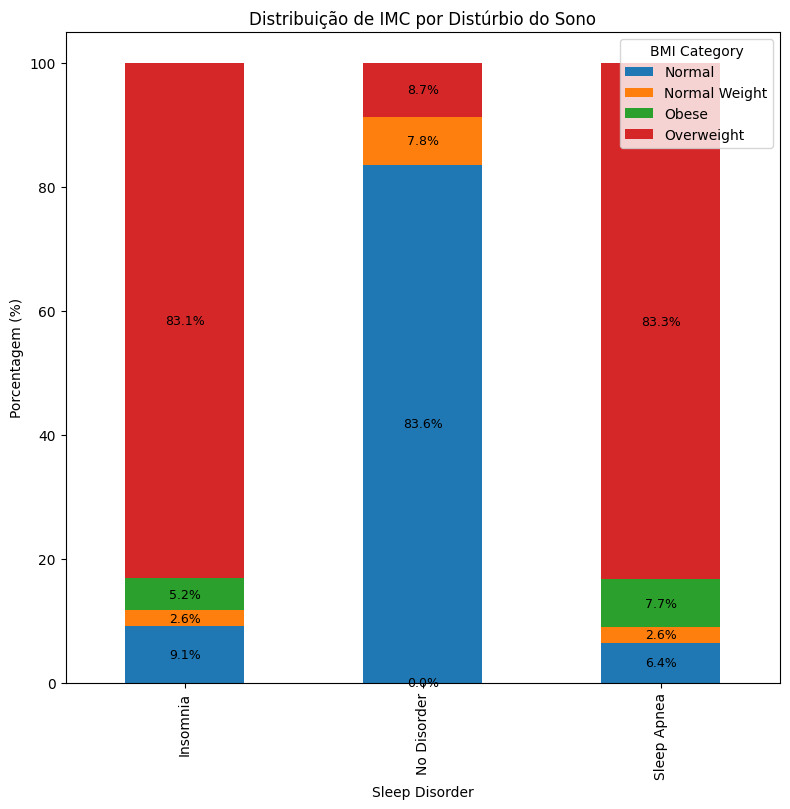

In [109]:
table_percent = pd.crosstab(
    df['Sleep Disorder'],
    df[categorical],
    normalize='index'
) * 100

ax = table_percent.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 8.2),
)

plt.ylabel('Porcentagem (%)')
plt.xlabel('Sleep Disorder')
plt.title('Distribuição de IMC por Distúrbio do Sono')
plt.legend(title=f'{categorical}')

for container in ax.containers:
    ax.bar_label(
        container,
        fmt='%.1f%%',
        label_type='center',
        fontsize=9,
        color='black'
    )

plt.tight_layout()
plt.show()


Há uma forte associação entre os distúrbios do sono e a obesidade. Tal associação é evidenciada pelas proporções das categorias `Obese` e `Overweight`, que representam 88,3% e 91% dos casos de Insônia e Apneia do Sono, respectivamente, sendo a categoria `Overweight` responsável por cerca de 83% do total de casos de ambos os distúrbios. Nos casos sem distúrbio, 83.6% dos indivíduos pertencem à categoria `Normal`, representando o extremo oposto dos distúrbios. Um aspecto intrigante observado é que, nos distúrbios do sono, indivíduos classificados como `Normal Weight` apresentam menos casos quando comparados aos indivíduos das categoria `Normal`, indicando, nessa faixa, uma relação inversamente proporcional com a obesidade.

##### **Sleep Disorder X Occupation**

In [110]:
categorical = categorical_cols[2]

table_counts = pd.crosstab(
    df['Sleep Disorder'],
    df[categorical]
)
table_counts['Total'] = table_counts.sum(axis=1)

display(table_counts)

Occupation,Accountant,Doctor,Engineer,Lawyer,Manager,Nurse,Sales Representative,Salesperson,Scientist,Software Engineer,Teacher,Total
Sleep Disorder,,,,,,,,,,,,
Insomnia,7,3,5,2,0,3,0,29,0,1,27,77
No Disorder,30,64,57,42,1,9,0,2,2,3,9,219
Sleep Apnea,0,4,1,3,0,61,2,1,2,0,4,78


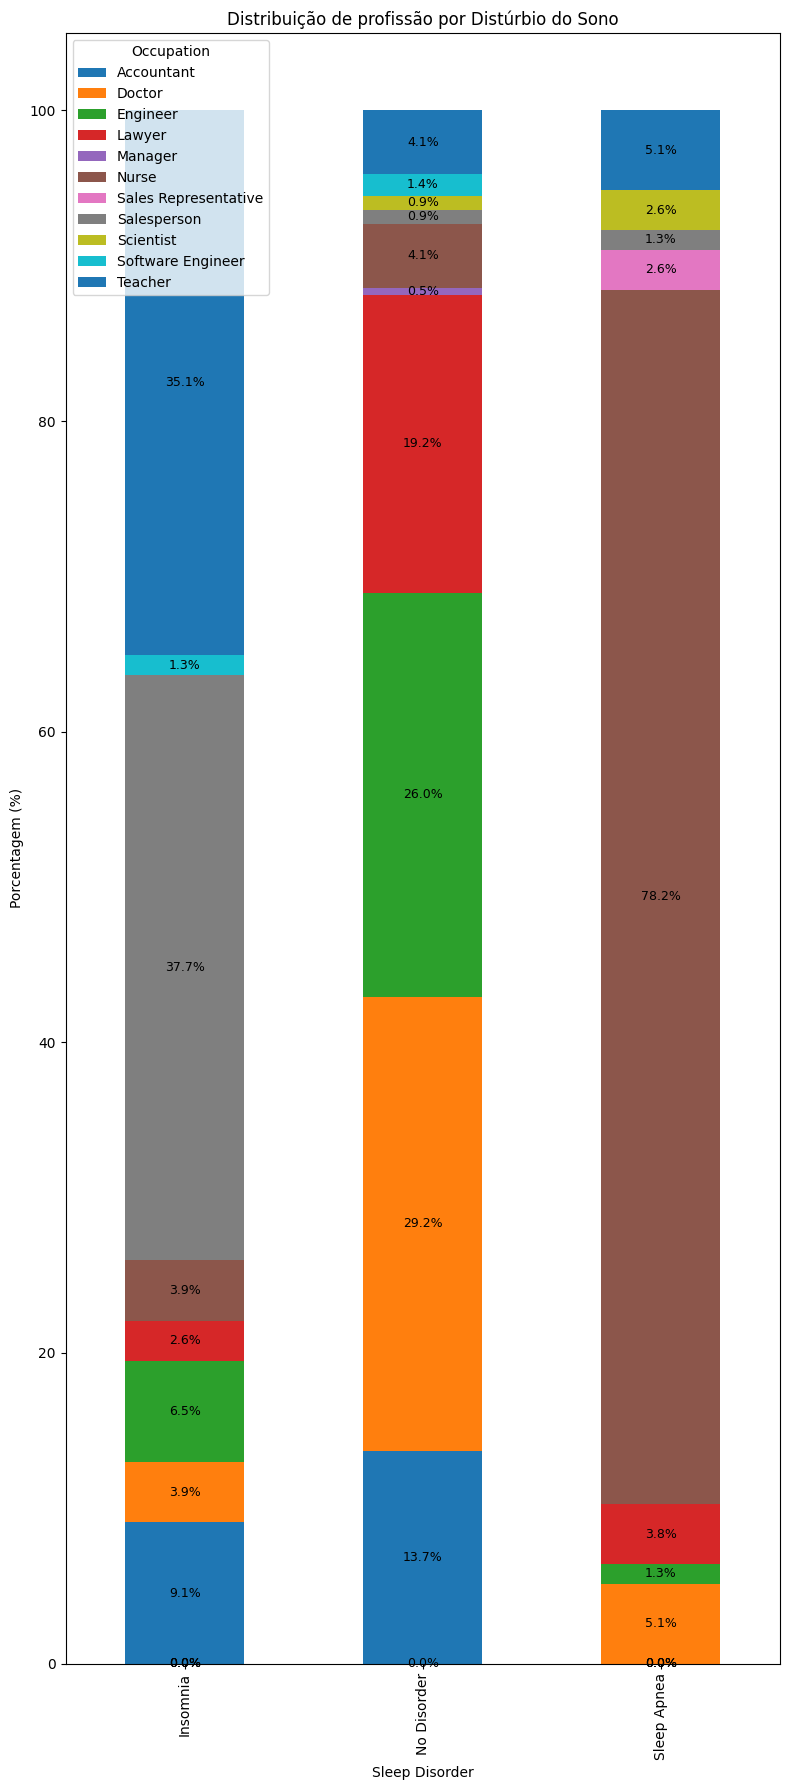

In [111]:
table_percent = pd.crosstab(
    df['Sleep Disorder'],
    df[categorical],
    normalize='index'
) * 100

ax = table_percent.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 18),
)

plt.ylabel('Porcentagem (%)')
plt.xlabel('Sleep Disorder')
plt.title('Distribuição de profissão por Distúrbio do Sono')
plt.legend(title=f'{categorical}')

for container in ax.containers:
    ax.bar_label(
        container,
        fmt='%.1f%%',
        label_type='center',
        fontsize=9,
        color='black'
    )

plt.tight_layout()
plt.show()


A variavél `Occupation` é a mais complexa para esse tipo de análise, pois possui diversos valores. O que chama atenção é a predominancia de enfermeiros diaginosticados com Apneia do sono, cerca de 80% dos casos.

#### **Variáveis numéricas**

##### **Sleep Disorder X Age**

In [112]:
df.groupby('Sleep Disorder')[numeric_cols[0]].describe().round(2)


,count,mean,std,min,25%,50%,75%,max
Sleep Disorder,,,,,,,,
Insomnia,77.0,43.52,4.81,28.0,43.0,44.0,45.00,53.0
No Disorder,219.0,39.04,7.83,27.0,32.0,38.0,43.00,59.0
Sleep Apnea,78.0,49.71,8.99,28.0,49.0,50.0,57.75,59.0


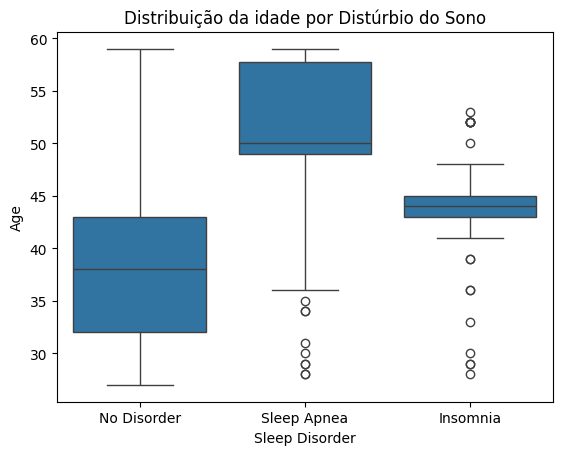

In [113]:
sns.boxplot(
    data=df,
    x='Sleep Disorder',
    y= numeric_cols[0]
)

plt.title('Distribuição da idade por Distúrbio do Sono')
plt.show()

A análise da idade revela padrões distintos entre os grupos. Indivíduos **sem distúrbio do sono** apresentam uma distribuição mais ampla, com mediana em torno de 38 anos, sugerindo que a ausência de distúrbios ocorre em diversas faixas etárias.

O grupo com **apneia do sono** concentra-se em idades mais elevadas, com mediana próxima de 50 anos, indicando que esse distúrbio é mais frequente em indivíduos mais velhos. A presença de alguns valores atípicos em idades mais baixas sugere que, embora menos comum, a apneia também pode ocorrer em pessoas mais jovens.

No caso da **insônia**, a mediana situa-se em torno de 44 anos, posicionando-se entre os outros dois grupos. A presença de outliers tanto em idades mais baixas quanto mais altas indica que a insônia afeta uma faixa etária mais ampla, embora com maior concentração em adultos de meia-idade.

##### **Sleep Disorder X Sleep Duration**

In [114]:
df.groupby('Sleep Disorder')[numeric_cols[1]].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Sleep Disorder,,,,,,,,
Insomnia,77.0,6.59,0.39,5.9,6.4,6.5,6.6,8.3
No Disorder,219.0,7.36,0.73,6.0,7.1,7.4,7.8,8.5
Sleep Apnea,78.0,7.03,0.97,5.8,6.1,6.8,8.1,8.2


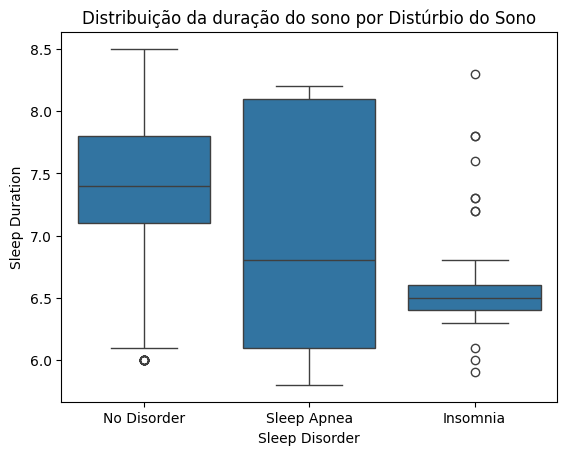

In [115]:
sns.boxplot(
    data=df,
    x='Sleep Disorder',
    y= numeric_cols[1]
)

plt.title('Distribuição da duração do sono por Distúrbio do Sono')
plt.show()

A duração do sono apresenta diferenças marcantes entre os grupos. Indivíduos sem distúrbio do sono possuem maior duração média, com mediana em torno de 7,4 horas, além de menor variabilidade, indicando um padrão de sono mais regular.

Pessoas com apneia do sono apresentam uma mediana inferior, próxima de 6,8 horas, e maior dispersão dos valores. Esse comportamento sugere maior irregularidade na duração do sono, possivelmente associada a interrupções frequentes durante a noite.

Já o grupo com insônia apresenta a menor mediana de duração do sono, em torno de 6,5 horas, além de vários valores atípicos. Isso reforça a característica central da insônia, marcada por dificuldade em manter uma duração adequada do sono.

##### **Sleep Disorder X Quality of Sleep**

In [116]:
df.groupby('Sleep Disorder')[numeric_cols[2]].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Sleep Disorder,,,,,,,,
Insomnia,77.0,6.53,0.80,4.0,6.0,7.0,7.0,9.0
No Disorder,219.0,7.63,0.98,6.0,7.0,8.0,8.0,9.0
Sleep Apnea,78.0,7.21,1.65,4.0,6.0,6.0,9.0,9.0


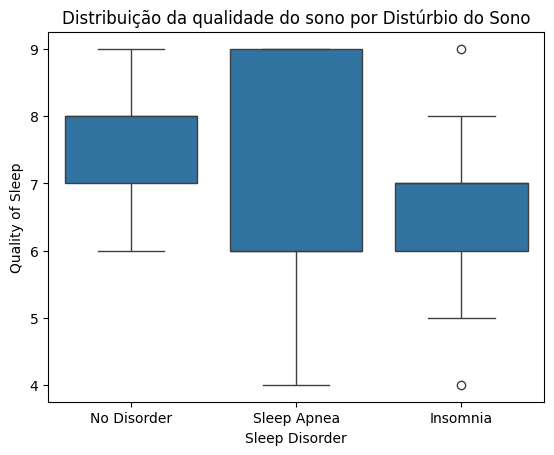

In [117]:
sns.boxplot(
    data=df,
    x='Sleep Disorder',
    y= numeric_cols[2]
)

plt.title('Distribuição da qualidade do sono por Distúrbio do Sono')
plt.show()

A análise da **qualidade do sono** demonstra que a percepção de descanso varia significativamente conforme a condição clínica. O grupo **sem distúrbio do sono** apresenta a maior estabilidade e uma qualidade satisfatória, com mediana em 8 e baixa dispersão, concentrando a maioria dos dados entre 7 e 8.

No grupo com **apneia do sono**, observa-se a maior variabilidade de todas as categorias. Embora a mediana seja elevada (9), a amplitude é vasta, estendendo-se até o nível 4. Isso sugere que, para este grupo, a qualidade do sono é muito heterogênea, possivelmente influenciada pela gravidade da condição em cada indivíduo.

O grupo com **insônia** apresenta a menor mediana de qualidade de sono (em torno de 7), com a maior parte dos dados concentrada entre 6 e 7. A presença de outliers tanto no limite inferior (4) quanto no superior (9) reforça que a insônia impacta negativamente a percepção de qualidade do sono de forma mais consistente e severa do que nos demais grupos.

##### **Sleep Disorder X Physical Activity Level**

In [118]:
df.groupby('Sleep Disorder')[numeric_cols[3]].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Sleep Disorder,,,,,,,,
Insomnia,77.0,46.82,11.75,30.0,45.0,45.0,45.0,90.0
No Disorder,219.0,57.95,20.93,30.0,30.0,60.0,75.0,90.0
Sleep Apnea,78.0,74.79,17.93,30.0,75.0,75.0,90.0,90.0


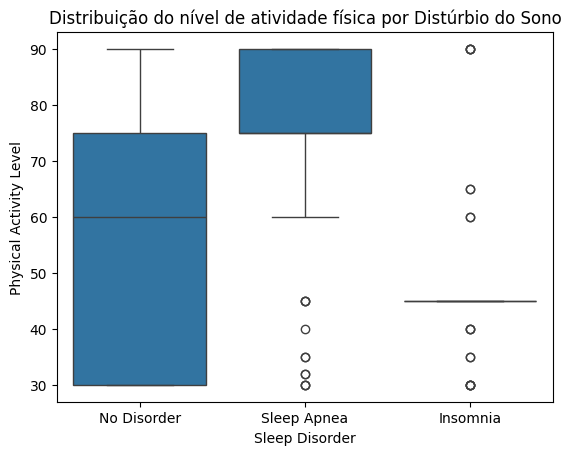

In [119]:
sns.boxplot(
    data=df,
    x='Sleep Disorder',
    y= numeric_cols[3]
)

plt.title('Distribuição do nível de atividade física por Distúrbio do Sono')
plt.show()

A distribuição do **nível de atividade física** revela comportamentos distintos entre as categorias de distúrbio do sono. Indivíduos **sem distúrbio do sono** apresentam uma ampla variabilidade, com mediana em 60 e uma distribuição que abrange desde níveis baixos (30) até altos (90).

O grupo com **apneia do sono** destaca-se por apresentar os maiores níveis de atividade física, com a mediana situada no topo da escala (90) e o terceiro quartil também concentrado nesse valor. No entanto, este grupo exibe diversos outliers inferiores, indicando que, embora a maioria seja muito ativa, existe uma parcela considerável com níveis de atividade reduzidos.

Já o grupo com **insônia** apresenta o perfil mais homogêneo e menos ativo. A mediana e os quartis estão achatados em torno de 45, sugerindo que quase todos os indivíduos deste grupo mantêm um nível de atividade física moderado-baixo, com apenas alguns outliers atingindo níveis mais elevados.

##### **Sleep Disorder X Stress Level**

In [120]:
df.groupby('Sleep Disorder')[numeric_cols[4]].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Sleep Disorder,,,,,,,,
Insomnia,77.0,5.87,1.46,3.0,4.0,7.0,7.0,8.0
No Disorder,219.0,5.11,1.59,3.0,4.0,5.0,6.0,8.0
Sleep Apnea,78.0,5.67,2.33,3.0,3.0,7.0,8.0,8.0


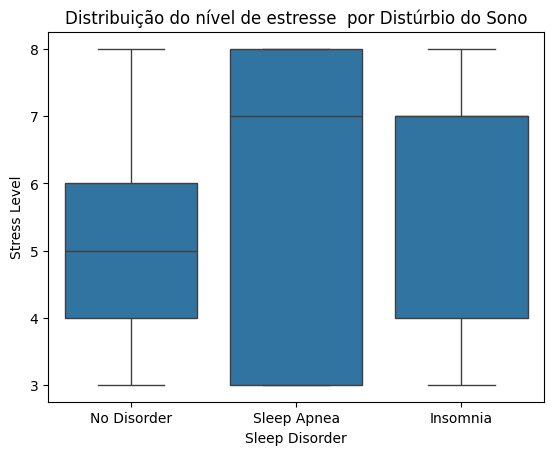

In [121]:
sns.boxplot(
    data=df,
    x='Sleep Disorder',
    y= numeric_cols[4]
)

plt.title('Distribuição do nível de estresse  por Distúrbio do Sono')
plt.show()

A distribuição do nível de estresse apresenta diferenças claras entre os grupos analisados. Indivíduos **sem distúrbio do sono** concentram-se em níveis moderados de estresse, com mediana em torno de 5 e menor variabilidade, indicando um padrão mais estável.

No grupo com **apneia do sono**, observa-se uma **mediana mais elevada**, próxima a 7, além de uma maior dispersão dos valores. Isso sugere que pessoas com apneia tendem a apresentar níveis de estresse mais altos e heterogêneos.

Já o grupo com **insônia** também apresenta níveis de estresse elevados, porém com mediana ligeiramente inferior à da apneia e com dispersão intermediária. No geral, o gráfico indica uma associação positiva entre a presença de distúrbios do sono e níveis mais altos de estresse.

##### **Sleep Disorder X Sístole**

In [122]:
df.groupby('Sleep Disorder')[numeric_cols[5]].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Sleep Disorder,,,,,,,,
Insomnia,77.0,132.04,3.94,115.0,130.0,130.0,135.0,142.0
No Disorder,219.0,124.05,5.73,115.0,120.0,125.0,130.0,140.0
Sleep Apnea,78.0,137.77,5.14,115.0,140.0,140.0,140.0,140.0


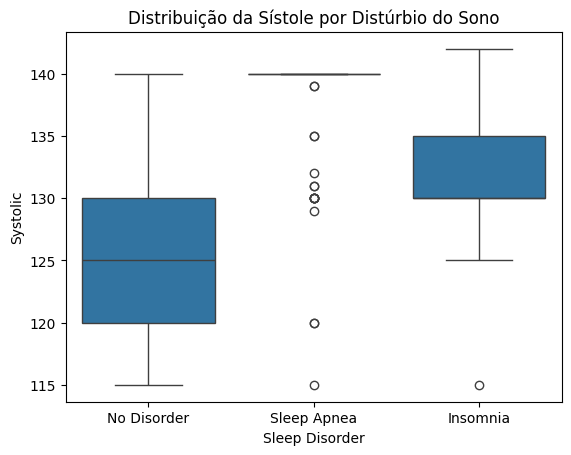

In [123]:
sns.boxplot(
    data=df,
    x='Sleep Disorder',
    y= numeric_cols[5]
)

plt.title('Distribuição da Sístole por Distúrbio do Sono')
plt.show()

A distribuição da pressão sistólica revela contrastes marcantes entre os grupos. Indivíduos **sem distúrbio do sono** apresentam os níveis mais baixos, com mediana em torno de **125 mmHg** e uma distribuição que, embora ampla, concentra a maioria dos casos em patamares considerados saudáveis.

No grupo com **apneia do sono**, observa-se uma tendência de pressão elevada, com a mediana atingindo o topo do gráfico em **140 mmHg.** Entretanto, este grupo é marcado por uma grande quantidade de valores atípicos (outliers) para baixo, o que indica uma alta variabilidade: enquanto muitos apresentam níveis hipertensos, outros mantêm valores significativamente menores, tornando o grupo heterogêneo.

Já o grupo com **insônia** demonstra a maior consistência em níveis elevados. Sua mediana situa-se acima de **130 mmHg**, com a maior parte dos dados concentrada em uma faixa estreita e alta. Diferente da apneia, o grupo de insônia mostra uma pressão sistólica consistentemente mais alta e menos dispersa.

##### **Sleep Disorder X Diástole**

In [124]:
df.groupby('Sleep Disorder')[numeric_cols[6]].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Sleep Disorder,,,,,,,,
Insomnia,77.0,86.86,3.18,75.0,85.0,85.0,90.0,95.0
No Disorder,219.0,81.00,3.99,75.0,80.0,80.0,85.0,95.0
Sleep Apnea,78.0,92.72,4.49,75.0,95.0,95.0,95.0,95.0


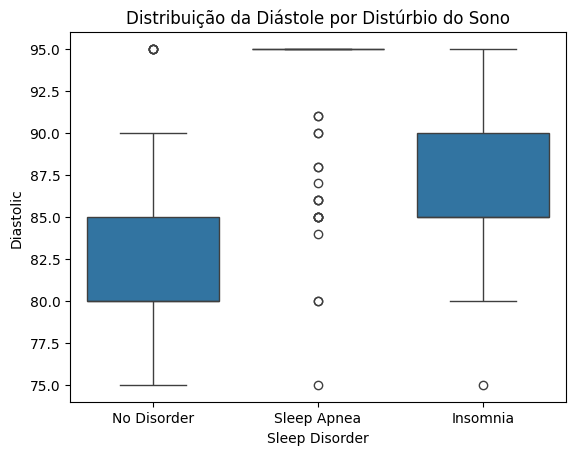

In [125]:
sns.boxplot(
    data=df,
    x='Sleep Disorder',
    y= numeric_cols[6]
)

plt.title('Distribuição da Diástole por Distúrbio do Sono')
plt.show()

A distribuição dos níveis de pressão diastólica revela comportamentos distintos entre os grupos. Indivíduos **sem distúrbio do sono** apresentam a menor mediana, situada em **80 mmHg**, com a maior parte dos dados concentrada entre 80 e 85 mmHg, indicando um padrão mais controlado e dentro da normalidade para a maioria.

No grupo com **apneia do sono**, observa-se o nível mais elevado de pressão diastólica, com a mediana atingindo o patamar de **95 mmHg**. Assim como na sístole, este grupo apresenta uma série de valores atípicos (outliers) que descem até os 75 mmHg, sugerindo que, embora a tendência central seja de hipertensão diastólica acentuada, existe uma dispersão considerável entre os indivíduos.

Já o grupo com **insônia** também apresenta níveis elevados, com mediana em torno de **90 mmHg**. A dispersão é intermediária, com a maioria dos indivíduos concentrada entre 85 e 90 mmHg, o que reforça uma tendência de pressão diastólica consistentemente superior à do grupo sem distúrbios, porém ligeiramente inferior à mediana do grupo com apneia.

##### **Sleep Disorder X Frequência Cardíaca**

In [126]:
df.groupby('Sleep Disorder')[numeric_cols[7]].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Sleep Disorder,,,,,,,,
Insomnia,77.0,70.47,4.95,65.0,65.0,72.0,72.0,85.0
No Disorder,219.0,69.02,2.66,65.0,68.0,70.0,70.0,77.0
Sleep Apnea,78.0,73.09,5.12,68.0,68.0,75.0,75.0,86.0


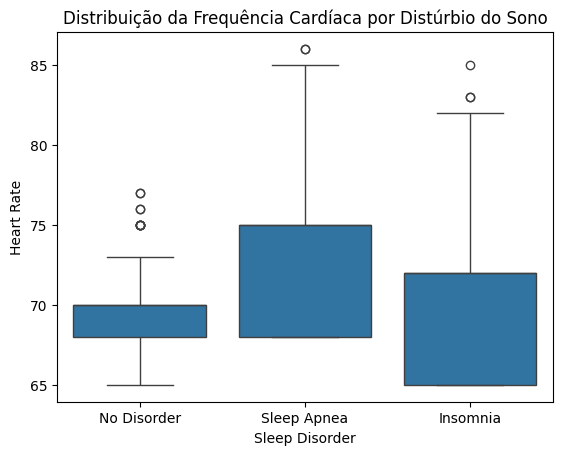

In [127]:
sns.boxplot(
    data=df,
    x='Sleep Disorder',
    y= numeric_cols[7]
)

plt.title('Distribuição da Frequência Cardíaca por Distúrbio do Sono')
plt.show()

A distribuição da frequência cardíaca apresenta variações notáveis de acordo com a condição de sono. Indivíduos **sem distúrbio do sono** concentram-se em níveis mais baixos e estáveis, com mediana em torno de **68 bpm** e baixa variabilidade, sugerindo um ritmo cardíaco mais constante em repouso.

No grupo com **apneia do sono**, observa-se uma **mediana mais elevada**, próxima a **72 bpm**, acompanhada por uma grande dispersão dos valores, que chegam a ultrapassar os 85 bpm. Isso indica que pessoas com apneia tendem a apresentar batimentos cardíacos mais acelerados e menos uniformes.

O grupo com **insônia**, por sua vez, apresenta uma mediana similar à de quem não possui distúrbios (cerca de **68 bpm**), porém com uma **amplitude muito maior** na base e no topo da distribuição. Isso sugere que, embora a média seja baixa, a insônia provoca uma instabilidade cardíaca significativa em muitos indivíduos. De forma geral, o gráfico indica que a presença de distúrbios, especialmente a apneia, está vinculada a frequências cardíacas médias mais altas ou mais instáveis.

##### **Sleep Disorder X Passos diários**

In [128]:
df.groupby('Sleep Disorder')[numeric_cols[8]].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Sleep Disorder,,,,,,,,
Insomnia,77.0,5901.30,1000.33,3000.0,6000.0,6000.0,6000.0,10000.0
No Disorder,219.0,6852.97,1393.47,4200.0,5000.0,7000.0,8000.0,10000.0
Sleep Apnea,78.0,7619.23,2168.19,3000.0,7000.0,7000.0,10000.0,10000.0


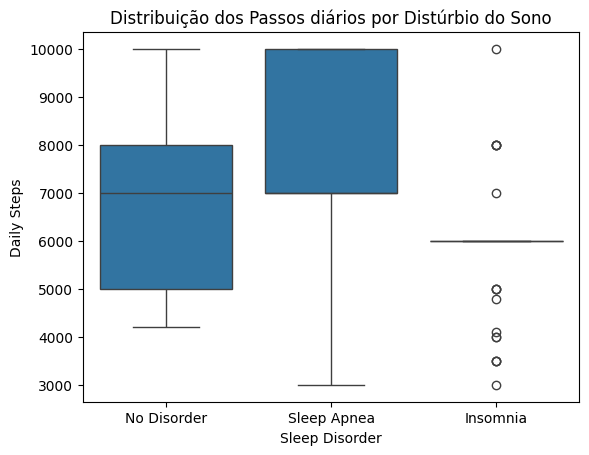

In [129]:
sns.boxplot(
    data=df,
    x='Sleep Disorder',
    y= numeric_cols[8]
)

plt.title('Distribuição dos Passos diários por Distúrbio do Sono')
plt.show()

A distribuição dos passos diários revela contrastes interessantes no nível de atividade física. Indivíduos **sem distúrbio do sono** apresentam uma mediana de **7.000 passos**, com uma distribuição equilibrada, indicando um estilo de vida moderadamente ativo e constante.

No grupo com **apneia do sono**, observa-se a **maior mediana**, atingindo o topo de **10.000 passos**. Entretanto, a dispersão é a maior entre todos os grupos, com valores que descem até os 3.000 passos, evidenciando que este grupo é composto por pessoas com perfis de atividade física muito distintos e opostos.

Já o grupo com **insônia** apresenta o menor nível de atividade e a maior homogeneidade, com mediana em torno de **6.000 passos**. O gráfico mostra que pessoas com insônia tendem a caminhar menos e de forma mais uniforme, com a maioria dos casos concentrada em um patamar de atividade física reduzida.

#### **Conclusão**

A análise bivariada revela que o perfil dos indivíduos é profundamente influenciado pela presença e pelo tipo de distúrbio do sono. Observou-se que variáveis demográficas e profissionais exercem papéis distintos: enquanto o **Gênero** e a **Profissão** sugerem nichos específicos de incidência, a **Idade** e o **IMC** mostram uma correlação positiva com o agravamento de condições como a apneia, indicando que o desgaste fisiológico e o peso corporal são fatores de risco determinantes.

No que diz respeito aos hábitos e saúde mental, os dados confirmam uma associação clara entre a baixa **Qualidade do Sono** e níveis elevados de **Estresse**, especialmente nos grupos com insônia e apneia. Notavelmente, embora a **Duração do Sono** varie, é a percepção de qualidade que mais se degrada na presença de distúrbios, alimentando um ciclo de fadiga que impacta diretamente o **Nível de Atividade Física.**

Os indicadores vitais e o comportamento cotidiano consolidam esse cenário de risco cardiovascular:

- **Pressão Arterial (Sístole/Diástole):** Ambos os distúrbios elevam a pressão arterial para patamares de alerta, com a apneia apresentando picos mais altos (mediana de 140/95 mmHg) e a insônia mantendo uma hipertensão mais constante.

- **Frequência Cardíaca:** A apneia, em particular, desestabiliza o ritmo cardíaco, apresentando as maiores medianas e dispersões.

- **Passos Diários:** Revelam o impacto no estilo de vida, onde indivíduos com insônia tendem ao sedentarismo (menor contagem de passos), enquanto o grupo com apneia apresenta uma heterogeneidade extrema, possivelmente refletindo diferentes estágios da condição.

Em suma, o **Target (Distúrbio do Sono)** não é um evento isolado, mas um nó central que se conecta a uma piora sistêmica nos indicadores de saúde. A transição do grupo "Sem Distúrbio" para os grupos de "Insônia" ou "Apneia" marca uma mudança clara de um estado de equilíbrio para um cenário de instabilidade metabólica e cardiovascular.

###**ANÁLISE MULTIVARIADA**

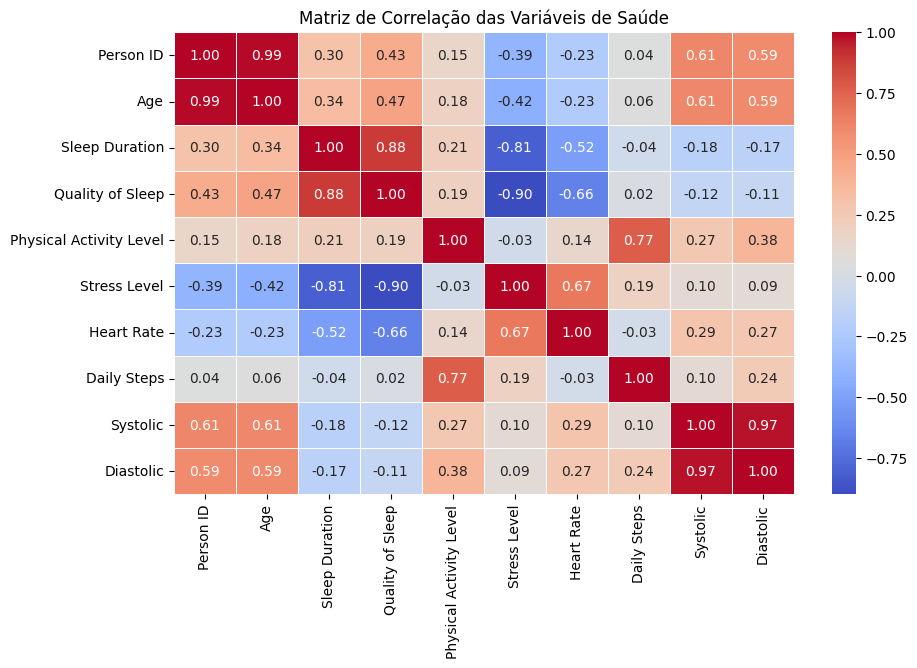

In [130]:
# Selecionando apenas as colunas numéricas para a correlação
numeric_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação das Variáveis de Saúde')
plt.show()

Com base no resultado da matriz de correlação,**a saúde cardiovascular (Pressão Arterial) não é apenas uma consequência do sono ruim, é o principal marcador biológico que separa pacientes saudáveis de pacientes com distúrbios graves neste dataset**

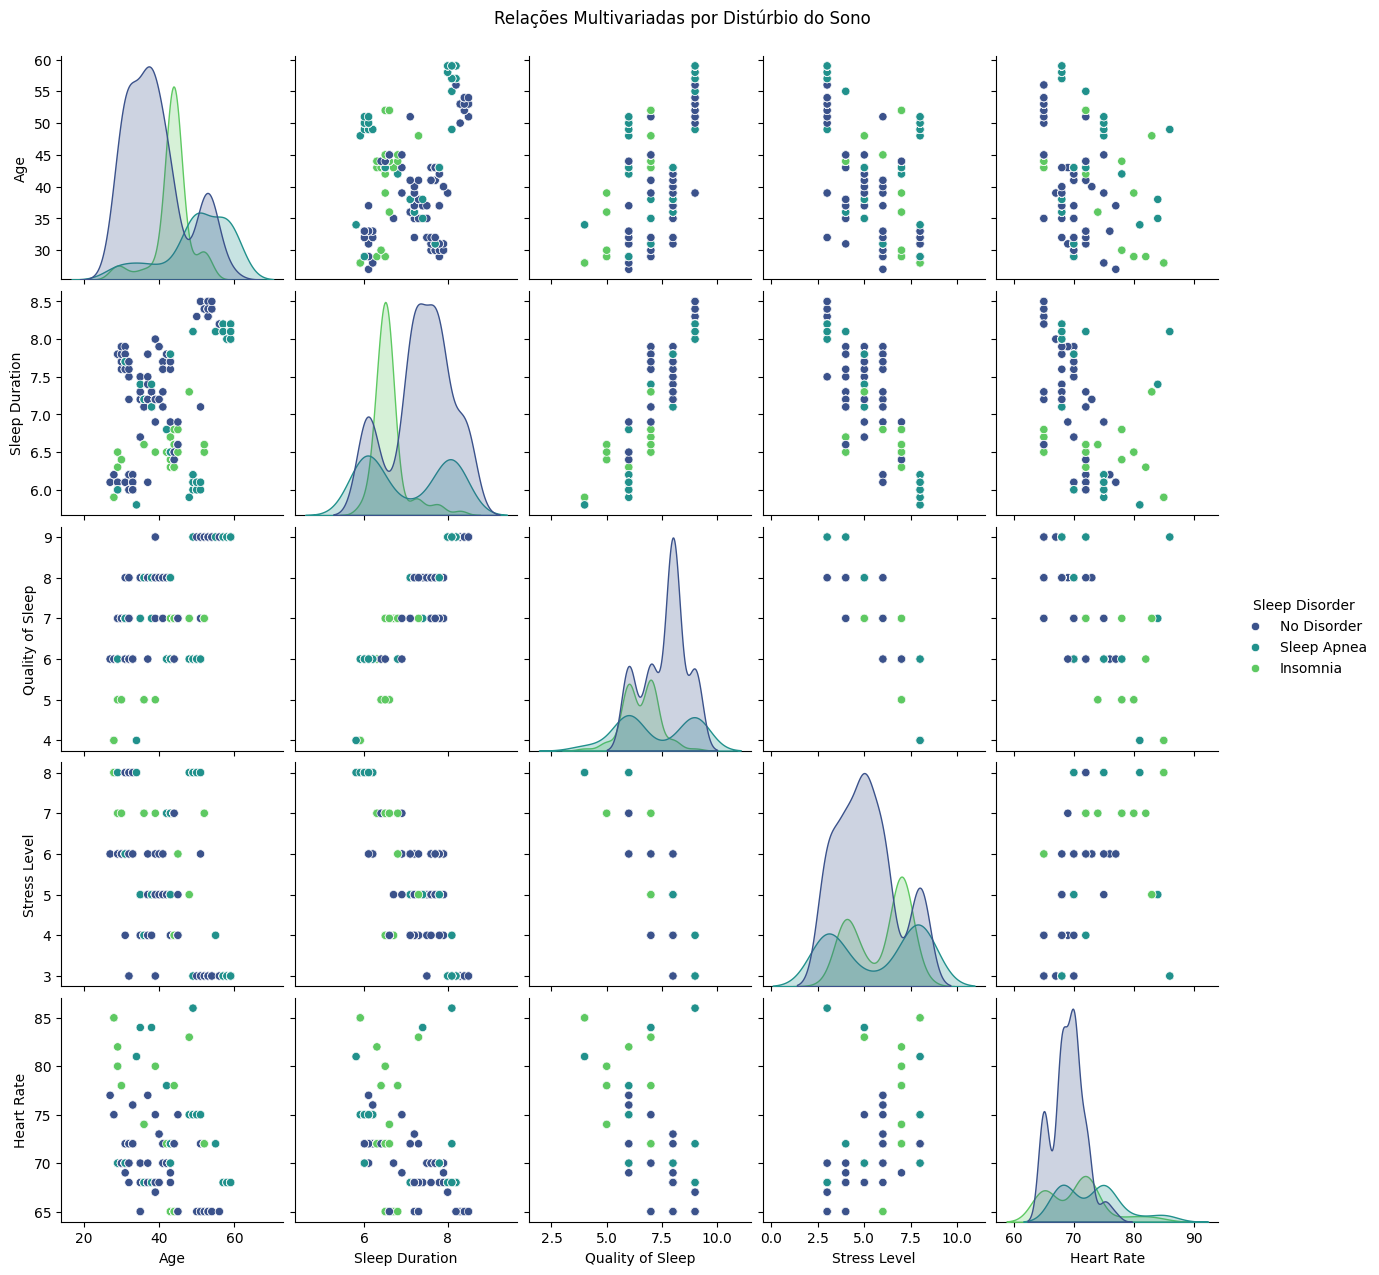

In [131]:
# Analisando as principais métricas físicas segmentadas pelo distúrbio de sono
sns.pairplot(df, vars=['Age', 'Sleep Duration', 'Quality of Sleep', 'Stress Level', 'Heart Rate'],
             hue='Sleep Disorder', palette='viridis', diag_kind='kde')
plt.suptitle('Relações Multivariadas por Distúrbio do Sono', y=1.02)
plt.show()

Existe um "ponto de ruptura" claro em **140 mmHg** de pressão sistólica. Observe que quase toda a massa de dados do grupo "Apnea" está acima dessa linha, enquanto o grupo "No Disorder" (saudável) está concentrado abaixo de 130 mmHg. Isso prova que a saúde cardiovascular é o biomarcador mais forte para prever a Apneia do Sono neste dataset, superando até a percepção subjetiva de qualidade do sono.

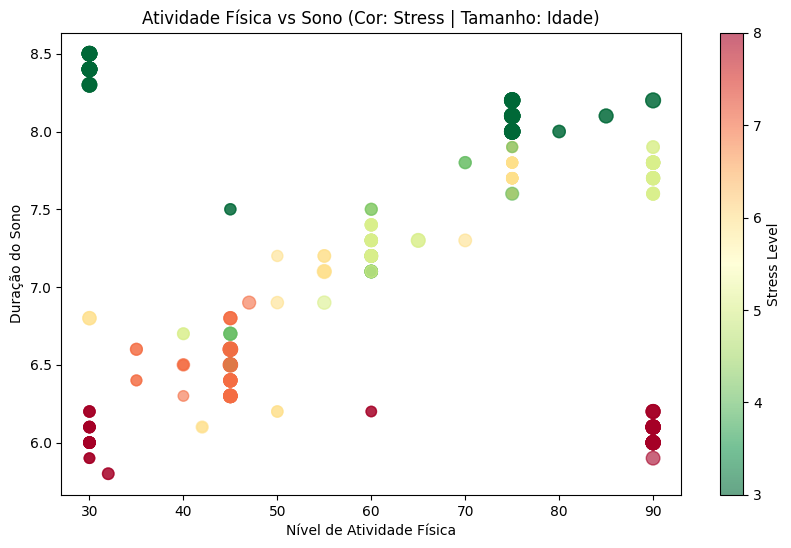

In [132]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Physical Activity Level'], df['Sleep Duration'],
            c=df['Stress Level'], s=df['Age']*2, cmap='RdYlGn_r', alpha=0.6)

plt.colorbar(scatter, label='Stress Level')
plt.xlabel('Nível de Atividade Física')
plt.ylabel('Duração do Sono')
plt.title('Atividade Física vs Sono (Cor: Stress | Tamanho: Idade)')
plt.show()

Com essa plotagem, percebe-se que pessoas com menos tempo de sono são significativamente mais estressadas se comparadas com pessoas que têm uma boa duração de sono. Além disso, o gráfico também nos mostra uma concentração de estresse em pessoas com um nível menor de atividade física.

####**Conclusão**

A análise multivariada revelou que os distúrbios do sono neste dataset não são eventos isolados, mas sim o resultado de uma convergência de fatores fisiológicos e ocupacionais. As principais evidências encontradas foram:

O Marcador Biológico Decisivo: A pressão arterial sistólica acima de 140 mmHg atua como um "divisor de águas" (threshold). Existe uma correlação quase perfeita entre níveis de hipertensão e o diagnóstico de Apneia do Sono, sugerindo que a saúde cardiovascular é o preditor mais forte do dataset.

Dicotomia de Distúrbios: A Apneia está fortemente ligada a indicadores físicos (IMC elevado e Pressão Arterial alta).

A Insônia apresenta um perfil mais comportamental, associada a altos níveis de estresse, mas nem sempre refletida em alterações físicas imediatas como a pressão.

Redundância de Métricas: Variáveis como Sleep Duration e Quality of Sleep possuem alta colinearidade, o que indica que, para modelos preditivos, podemos focar em uma delas ou criar um índice combinado para evitar redundância.

##**PRÉ PROCESSAMENTO DOS DADOS**

##### **1. TRATAMENTO DE MISSING VALUES E DUPLICATAS**


In [133]:
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

Ao pesquisar as categorias do BMI, descobrmimos que não há distinção entre a catergoria `Normal Weight` e `Normal`. Sendo duplicatas aproximadas. Tal observação foi citada na análise univariada

#####**2. ENCODING DE VARIÁVEIS CATEGÓRICAS**


In [134]:
# Atributo BMI Category
BMI_mapping = {
    'Normal': 0,
    'Overweight': 1,
    'Obese': 2,
}

df['BMI Category'] = df['BMI Category'].map(BMI_mapping)

Foi aplicado **Ordinal Encoding manual**, pois as categorias foram convertidas para inteiros por meio de um mapeamento explícito, preservando uma relação de ordem entre os níveis.

In [135]:
# Atributo Gender
df = pd.get_dummies(df, columns=['Gender'], dtype=int)

Foi aplicado **One-Hot Encoding** usando get_dummies, convertendo a variável nominal Gender em colunas binárias independentes, sem impor ordem entre categorias.

In [136]:
# Atributo Sleep Disorder
Disorder_mapping = {
    'No Disorder': 0,
    'Sleep Apnea': 1,
    'Insomnia': 2,
}

df['Sleep Disorder'] = df['Sleep Disorder'].map(Disorder_mapping)

Foi aplicado **Label Encoding manual** no target, convertendo as classes em rótulos numéricos para viabilizar a classificação multiclasse, sem implicar ordem semântica entre elas.

In [137]:
# Atributo Occupation
contagem = df['Occupation'].value_counts()

profissoes_raras = contagem[contagem <= 4].index
df['Occupation'] = df['Occupation'].replace(profissoes_raras, 'Other')
print(df['Occupation'].unique())
df = pd.get_dummies(df, columns=['Occupation'], prefix='Occ', dtype=int)


['Other' 'Doctor' 'Teacher' 'Nurse' 'Engineer' 'Accountant' 'Lawyer'
 'Salesperson']


Foi aplicado **agrupamento de categorias raras** para reduzir a cardinalidade da feature e, em seguida, **One-Hot Encoding** para transformar as categorias nominais em variáveis binárias, evitando esparsidade excessiva e overfitting.

#####**3. DROPANDO FEATURES CORRELACIONADAS**

In [138]:
df = df.drop(columns=['Person ID', 'Daily Steps', 'Quality of Sleep'])

Foi realizada a **remoção de três colunas** por critérios técnicos e de negócio, visando melhorar a qualidade das entradas do modelo e evitar ruído.

`Person ID` foi removida por ser apenas um identificador único. Esse tipo de variável não possui valor preditivo e pode introduzir padrões artificiais no treinamento.

`Daily Steps` foi excluída por decisão de negócio: como o produto final será um formulário, a maioria dos usuários não sabe informar com precisão o número de passos diários. Manter essa feature poderia gerar dados imprecisos e reduzir a confiabilidade das previsões.

`Quality of Sleep` foi removida devido à **alta correlação** com `Sleep Duration`. Optou-se por manter `Sleep Duration` por ser uma medida quantitativa e objetiva, enquanto `Quality of Sleep` é subjetiva e mais suscetível a variação de percepção, reduzindo a robustez do modelo.

#####**4. DIVISÃO EM CONJUNTO DE TREINO, VALIDAÇÃO E TESTE**

In [139]:
X = df.drop(columns=['Sleep Disorder'])
y = df['Sleep Disorder']

Foi realizada a separação entre **variáveis preditoras (features) e variável alvo (target).** A coluna `Sleep Disorder` foi isolada em `y`, enquanto as demais colunas foram mantidas em `X`.

Essa etapa é necessária para o treinamento supervisionado, pois o modelo utiliza `X` como conjunto de entradas e `y` como rótulo a ser previsto. A separação também evita vazamento de dados (data leakage), garantindo que a variável alvo não seja usada como entrada durante o treino.

In [140]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Verificação rápida
print("Proporção no Treino:\n", y_train.value_counts(normalize=True))
print("\nProporção no Teste:\n", y_test.value_counts(normalize=True))

Proporção no Treino:
 Sleep Disorder
0    0.585284
1    0.207358
2    0.207358
Name: proportion, dtype: float64

Proporção no Teste:
 Sleep Disorder
0    0.586667
1    0.213333
2    0.200000
Name: proportion, dtype: float64


Foi realizada a **divisão do dataset em conjuntos de treino e teste** usando `train_test_split`, com 80% dos dados para treino e 20% para teste.

A divisão foi feita de forma **estratificada** (`stratify=y`), preservando a proporção das classes do target em ambos os conjuntos. Como o dataset é pequeno, essa estratégia é importante para evitar desequilíbrio entre as classes no treino e no teste, garantindo uma avaliação mais confiável do modelo.

O parâmetro `random_state=42` foi definido para tornar a divisão reproduzível. Em seguida, foi feita uma verificação das proporções das classes em cada conjunto para confirmar que a estratificação foi aplicada corretamente.

#####**5. FEATURE SCALING / NORMALIZAÇÃO**

In [141]:
numeric_cols = ['Age', 'Sleep Duration',
                'Physical Activity Level', 'Stress Level',
                'Systolic', 'Diastolic', 'Heart Rate',
                ]

In [142]:
parametros_clinicos = {}

for col in numeric_cols:
    parametros_clinicos[col] = {
        'media': X_train[col].mean(),
        'desvio': X_train[col].std()
    }
print(parametros_clinicos)

{'Age': {'media': np.float64(41.862876254180605), 'desvio': 8.585804173759081}, 'Sleep Duration': {'media': np.float64(7.122742474916388), 'desvio': 0.7967327391411487}, 'Physical Activity Level': {'media': np.float64(59.13377926421405), 'desvio': 21.07772837987556}, 'Stress Level': {'media': np.float64(5.4280936454849495), 'desvio': 1.779076765868213}, 'Systolic': {'media': np.float64(128.57859531772576), 'desvio': 7.805286242173309}, 'Diastolic': {'media': np.float64(84.67892976588628), 'desvio': 6.149474047877638}, 'Heart Rate': {'media': np.float64(70.26086956521739), 'desvio': 4.295952587877578}}


In [143]:
X_train_norm = X_train.copy()
X_train_norm[numeric_cols] = (X_train[numeric_cols] - X_train[numeric_cols].mean()) / X_train[numeric_cols].std()

X_test_norm = X_test.copy()
X_test_norm[numeric_cols] = (X_test[numeric_cols] - X_train[numeric_cols].mean()) / X_train[numeric_cols].std()

Foi aplicada **normalização por z-score (padronização**) nas features numéricas, transformando cada variável para ter média 0 e desvio padrão 1.

O cálculo foi feito usando a fórmula `(x − média) / desvio padrão`. As estatísticas (média e desvio) foram calculadas **apenas no conjunto de treino** e reutilizadas no conjunto de teste. Essa prática evita data leakage, pois impede que informações do teste influenciem o processo de preparação dos dados.

A normalização é importante para modelos sensíveis à escala das variáveis, ajudando na estabilidade numérica e na convergência do treinamento.

## **Conclusão**

Após a análise exploratória e o pré-processamento, o dataset foi preparado de forma consistente para a etapa de modelagem. Foram tratados aspectos estruturais e semânticos das variáveis, incluindo remoção de identificadores e atributos pouco confiáveis do ponto de vista de negócio, redução de cardinalidade em categorias raras, codificação adequada das variáveis categóricas e padronização das features numéricas.

Também foi realizada a separação correta entre features e target, seguida de divisão estratificada em treino e teste - medida especialmente importante devido ao tamanho reduzido do dataset - garantindo preservação da distribuição das classes e avaliação mais confiável. A normalização foi aplicada usando apenas estatísticas do conjunto de treino, evitando vazamento de dados.

Com isso, o conjunto final de dados encontra-se limpo, coerente e alinhado tanto com critérios técnicos quanto com o contexto de uso do produto, oferecendo uma base adequada para o treinamento e comparação de modelos de classificação.

O próximo colab é o de **[Desenvolvidemento](https://colab.research.google.com/drive/1ZvHcHiQM4VPUL8MGKM7PfqMJltERJfMr)**